# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

Just for reference:

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [27]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [28]:
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.734142,3.539735
std,0.473986,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.113276,0.692051
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000


In [29]:
# There is significant variability in the price of diamonds, especially in the 3/4th quantiles of the data.

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [30]:
# I would say that all of carat, color, clarity  and quality of cut will have significant impacts on the price
# of a diamond.

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [31]:
# grouping by color
diamonds.groupby('color').agg('mean')

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518130,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222728,3.846369
2,0.911627,2.933871,61.836557,57.518176,4484.958805,5.984776,5.981484,3.699147
3,0.771088,3.463419,61.757449,57.288060,3998.145173,5.678549,5.681198,3.507966
4,0.736509,3.134605,61.694087,57.433148,3725.091938,5.616727,5.620529,3.465938
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.416949,3.337767
6,0.657715,2.691025,61.698066,57.404355,3168.106436,5.417851,5.421928,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

In [32]:
# There seems to be a pretty clear linear relationship between price and color, but also between color and carat
# which also means between color and (measurements)

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

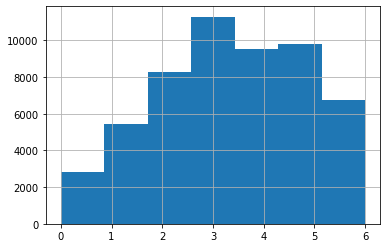

In [33]:
diamonds.color.hist(bins=7)

In [34]:
# in my color column the zero is the highest quality.
# we can see a left skewed distribution where the highest quality colors are more rare.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [35]:
diamonds.groupby('carat').agg('mean')

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333
0.21,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000
0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468
0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591
...,...,...,...,...,...,...,...,...
4.00,1.000000,0.000000,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000
4.01,0.500000,0.000000,61.750000,61.500000,15223.000000,10.080000,10.014754,6.205000
4.13,2.000000,0.000000,64.800000,61.000000,17329.000000,10.000000,9.850000,6.430000


In [36]:
# as mentioned above, the carat columns seems to be highly correlated with all of color, and size attributes


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

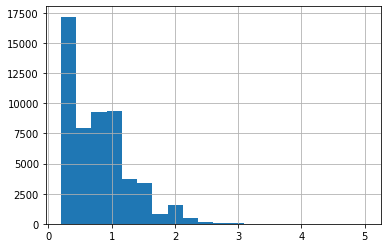

In [37]:
diamonds.carat.hist(bins=20)
# we observe that most diamonds fall within 0 and 2 and there are a few outliers.

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [38]:
diamonds.groupby('table').agg('mean')

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,1.0,4.00,62.90,4997.0,6.450,6.410,4.040
44.0,0.2900,5.0,4.00,62.80,474.0,4.200,4.240,2.650
49.0,0.6500,3.0,3.00,64.25,2290.5,5.355,5.320,3.425
50.0,1.5100,3.0,2.00,61.50,8995.5,7.380,7.295,4.510
50.1,0.9400,2.0,1.00,66.00,3353.0,6.130,6.170,4.060
...,...,...,...,...,...,...,...,...
71.0,0.6800,3.0,2.00,58.00,1633.0,5.850,5.700,3.350
73.0,0.6025,4.5,3.25,68.90,2406.5,5.520,5.465,3.745
76.0,0.7900,3.0,2.00,65.30,2362.0,5.520,5.130,3.350


In [39]:
# the relationship here is not so clear.

**Finally, do the same with the `clarity` column.**

In [40]:
diamonds.groupby('clarity').agg('mean')

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,6.709458,4.224688
1,1.077602,3.469967,61.771567,57.926823,5062.267356,6.404157,6.395579,3.952642
2,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640636
3,0.763850,3.494370,61.724249,57.418040,3924.166204,5.658633,5.659782,3.492788
4,0.727108,3.161812,61.667968,57.313966,3839.144308,5.572860,5.580017,3.437925
5,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465
6,0.503131,3.350848,61.624521,56.883881,2519.512315,4.961721,4.976437,3.062132
7,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659


In [41]:
 # the same for clarity as table, i can't see a clear relationship.

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [42]:
# carat and color seem to have the largest effect on price.
# clarity seems to not be so important, and I didnt' analyze the quality of cut.

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


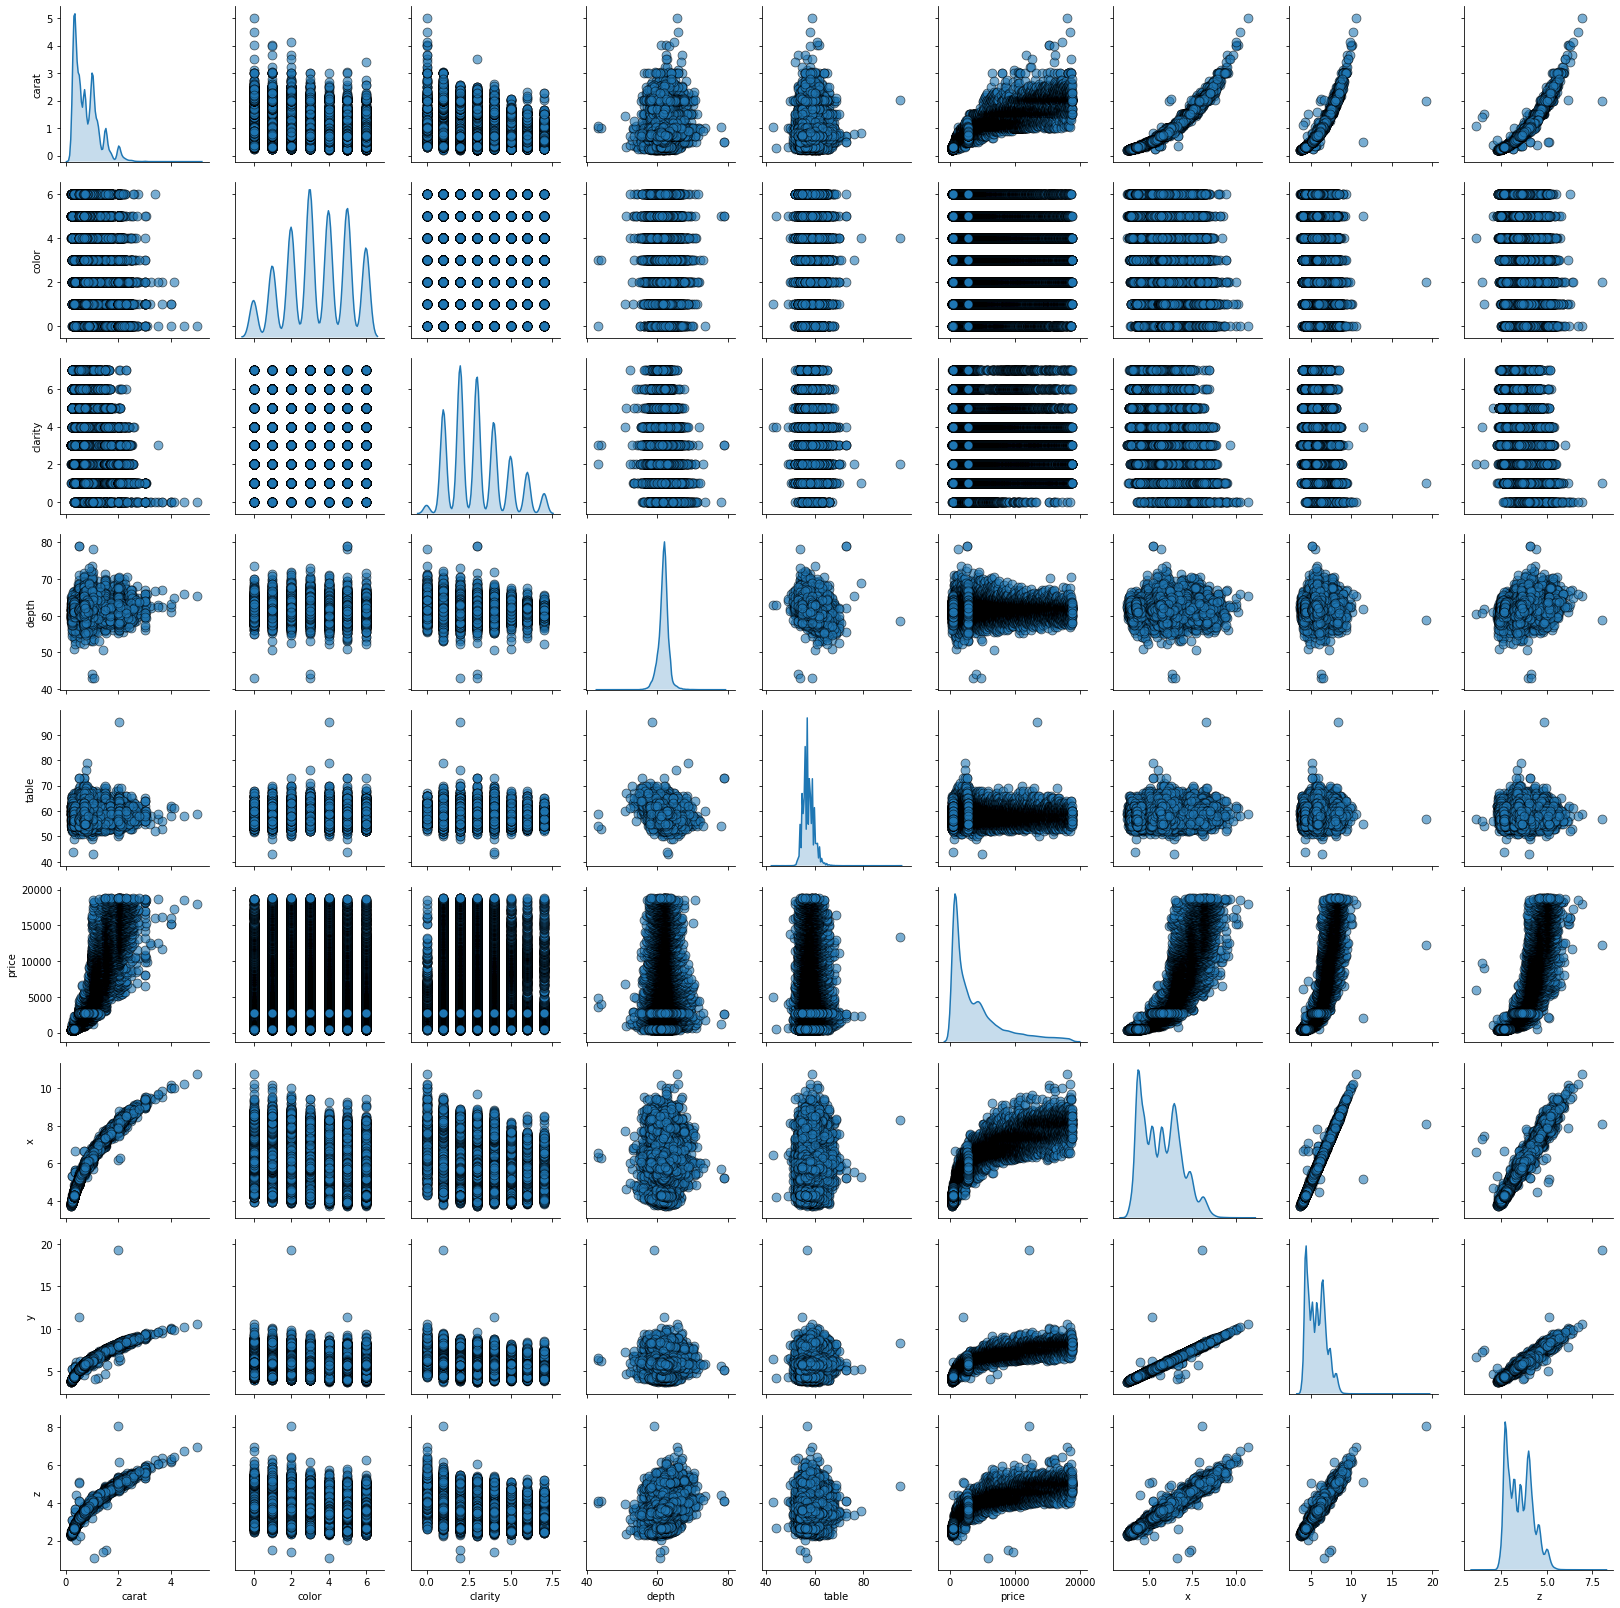

In [43]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [44]:
# The most interesting relationship seems to be between carat / dimensions and price of diamond.

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

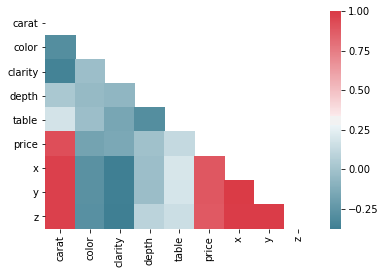

In [50]:
correlation = diamonds.corr()

mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, cmap=cmap, mask=mask, annot= False)

**What do you see here? Regarding the results before, does it fit with them?**

### Some conclusions
**I see that the carat is highly correlated with the dimensions of the diamond, which is also very highly correlated with the price**

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

The slope is: 7755.632924871648
The intercept is: -2255.923406988887


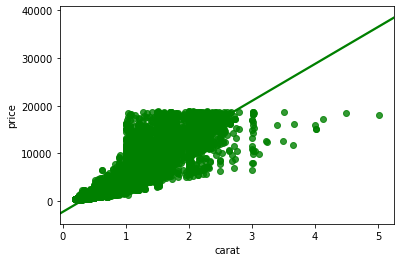

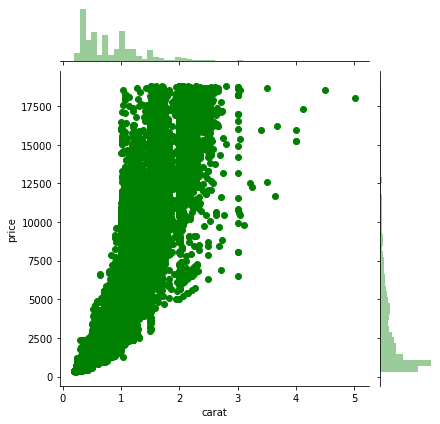

In [60]:
sns.regplot('carat', 'price', data= diamonds, color= 'g')
sns.jointplot('carat', 'price', data= diamonds, color= 'g')

In [62]:
# apply linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds['carat'], diamonds['price'])

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The r_value is: ' + str(r_value))
print ('The std error is: ' + str(std_err))


The slope is: 7755.632924871648
The intercept is: -2255.923406988887
The r_value is: 0.9216104923341861
The std error is: 14.06424017321538


**What do you think?**

#### Conclusions
- There's a linear correlation between carat and price up until a point where the price stabilizes.
- Some 1 carat diamonds cost 20k and the same as 5 carats.
- Maybe we should use a non linear model?
- The linear regression has a pretty good coef of determination. But I'm actually not very sure of how to interpret the standard error that the function outputs.

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

I would maybe look into the color feature because it seems to be negatively correlative with carat, but it doesn't make much sense with the data given in the codebook.
**Color	Diamond colour, from J (worst) to D (best)**

*perhaps maybe it is some kind of combination between color and carat that makes for the most expensive diamonds?*

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.